# Table of rnaQuast output - basic metrics

Powered by chatgpt4! 

"We acknowledge the use of ChatGPT, an AI language model developed by OpenAI, for assistance in data processing and visualization." 

<3

In [1]:
import os
import pandas as pd

In [9]:
def summarize(base_dir):
    summary_df = pd.DataFrame()
    for i in range(32, 60 + 1):
        dir_name = f'HS{i:03d}_rnaquast'
        dir_path = os.path.join(base_dir, dir_name, f'HS{i:03d}_rnaspades_output')
        
        # Ensure the directory exists
        if os.path.isdir(dir_path):
            # Path to the text file
            file_path = os.path.join(dir_path, 'basic_metrics.txt')
        
           # Ensure the file exists
            if os.path.isfile(file_path):
                with open(file_path, 'r') as file:
                    lines = file.readlines()
                    
                     # Dictionary to store the metrics for the current directory
                    data_dict = {}
                    
                    # Skip headers and empty lines, start reading actual data
                    for line in lines:
                        line = line.strip()
                        if line and not line.startswith('==') and ('METRICS/TRANSCRIPTS') not in line:
                            metric, value = line.rsplit(maxsplit=1)
                            data_dict[metric] = value
                    
                    # Create a DataFrame from the dictionary
                    df = pd.DataFrame.from_dict(data_dict, orient='index', columns=[dir_name])
                    
                    # Concatenate the current DataFrame with the summary DataFrame
                    summary_df = pd.concat([summary_df, df], axis=1)
                    
    
    return summary_df

In [10]:
base_dir = '/vortexfs1/omics/alexander/collab/2024-metaT-intercal/output/assembled/rnaQuast/'  
summary_df = summarize(base_dir)

In [11]:
#Make sure this table aligns with rnaQuast output 
summary_df.head()

,HS032_rnaquast,HS033_rnaquast,HS034_rnaquast,HS035_rnaquast,HS036_rnaquast,HS037_rnaquast,HS038_rnaquast,HS039_rnaquast,HS040_rnaquast,HS041_rnaquast,...,HS051_rnaquast,HS052_rnaquast,HS053_rnaquast,HS054_rnaquast,HS055_rnaquast,HS056_rnaquast,HS057_rnaquast,HS058_rnaquast,HS059_rnaquast,HS060_rnaquast
Transcripts,2581052,3639642,3009170,2606194,2750111,685223,2903086,3559451,2962787,3362385,...,221037,3208555,3899081,2592536,3718132,1824530,1613633,17774406,6674768,6244016
Transcripts > 500 bp,72608,69128,57036,51097,49725,3490,66189,167657,30484,75568,...,15696,181072,511445,189972,215790,130693,108669,3221849,489235,419903
Transcripts > 1000 bp,12975,12282,10035,9524,8065,667,11829,38345,4457,14974,...,2113,35518,145029,47421,33351,27952,21304,963950,82931,68619
Average length of assembled transcripts,212.056,203.887,202.855,202.689,201.911,186.843,207.272,236.316,195.151,207.286,...,318.87,330.852,416.712,332.496,315.409,327.627,320.305,414.413,317.664,312.886
Longest transcript,9582,9701,9382,10079,9341,4906,7823,10655,9696,14417,...,8088,16883,88592,17760,11318,43422,10573,24283,8100,9869


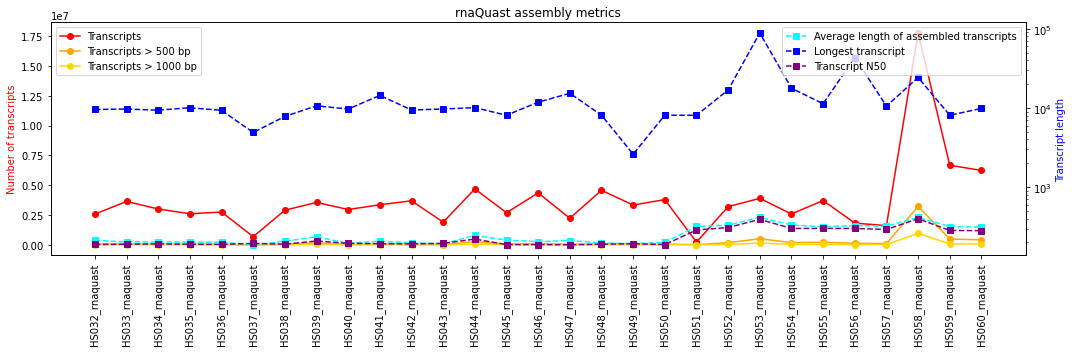

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(summary_df)
df = df.drop('Total length') 

primary_metrics = ['Transcripts', 'Transcripts > 500 bp', 'Transcripts > 1000 bp']
secondary_metrics = ['Average length of assembled transcripts', 'Longest transcript', 'Transcript N50']

primary_colors = ['red', 'orange', 'gold']
secondary_colors = ['cyan','blue','purple']

# Plotting
fig, ax1 = plt.subplots(figsize=(15, 5))

# Plot primary metrics on ax1 (left y-axis)
for idx, sample in enumerate(df.index):
    if sample in primary_metrics:
        color = primary_colors[primary_metrics.index(sample)]
        ax1.plot(df.columns, df.loc[sample].astype(float), marker='o', label=sample, color=color)

# Set labels and title for primary y-axis
#ax1.set_xlabel('Samples')
ax1.set_ylabel('Number of transcripts', color=primary_colors[0])
ax1.set_title('rnaQuast assembly metrics')
plt.xticks(rotation=90)
#ax1.set_yscale('log')

# Create ax2 (right y-axis) for secondary metrics
ax2 = ax1.twinx()

# Plot secondary metrics on ax2 (right y-axis)
for idx, sample in enumerate(df.index):
    if sample in secondary_metrics:
        color = secondary_colors[secondary_metrics.index(sample)]
        ax2.plot(df.columns, df.loc[sample].astype(float), marker='s', linestyle='--', label=sample, color=color)

# Set labels for secondary y-axis
ax2.set_ylabel('Transcript length', color=secondary_colors[1])

# Show legends for both plots
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax2.set_yscale('log')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

# Table of rnaQuast output - sensitivity

In [13]:
def summarize(base_dir):
    summary_df = pd.DataFrame()
    # Loop through the directory names
    for i in range(32, 60 + 1):
        dir_name = f'HS{i:03d}_rnaquast'
        dir_path = os.path.join(base_dir, dir_name, f'HS{i:03d}_rnaspades_output')
        
              # Ensure the directory exists
        if os.path.isdir(dir_path):
            # Path to the text file
            file_path = os.path.join(dir_path, 'sensitivity.txt')
        
           # Ensure the file exists
            if os.path.isfile(file_path):
                with open(file_path, 'r') as file:
                    lines = file.readlines()
                    
                     # Dictionary to store the metrics for the current directory
                    data_dict = {}
                    
                    # Skip headers and empty lines, start reading actual data
                    for line in lines:
                        line = line.strip()
                        if line and not line.startswith('==') and ('METRICS/TRANSCRIPTS') not in line:
                            metric, value = line.rsplit(maxsplit=1)
                            data_dict[metric] = value
                    
                    # Create a DataFrame from the dictionary
                    df = pd.DataFrame.from_dict(data_dict, orient='index', columns=[dir_name])
                    
                    # Concatenate the current DataFrame with the summary DataFrame
                    summary_df = pd.concat([summary_df, df], axis=1)
                    
    
    return summary_df

In [14]:
base_dir = '/vortexfs1/omics/alexander/collab/2024-metaT-intercal/output/assembled/rnaQuast/'  
summary_df = summarize(base_dir)

In [15]:
summary_df

,HS032_rnaquast,HS033_rnaquast,HS034_rnaquast,HS035_rnaquast,HS036_rnaquast,HS037_rnaquast,HS038_rnaquast,HS039_rnaquast,HS040_rnaquast,HS041_rnaquast,...,HS051_rnaquast,HS052_rnaquast,HS053_rnaquast,HS054_rnaquast,HS055_rnaquast,HS056_rnaquast,HS057_rnaquast,HS058_rnaquast,HS059_rnaquast,HS060_rnaquast
Complete,26.667,24.706,21.961,39.216,19.608,1.961,16.471,41.176,17.255,60.392,...,9.412,24.706,65.882,25.098,48.627,33.725,54.51,95.686,40.392,40.392
Partial,37.255,36.471,40.784,38.431,43.137,22.353,38.039,32.549,40.0,21.961,...,20.392,44.314,22.353,47.059,32.941,45.882,32.157,2.745,40.784,40.392
Genes,159199,166260,119642,111183,109325,7360,146241,351805,78160,162324,...,45670,737422,723061,526475,786748,346700,300326,6521591,1372653,1251693


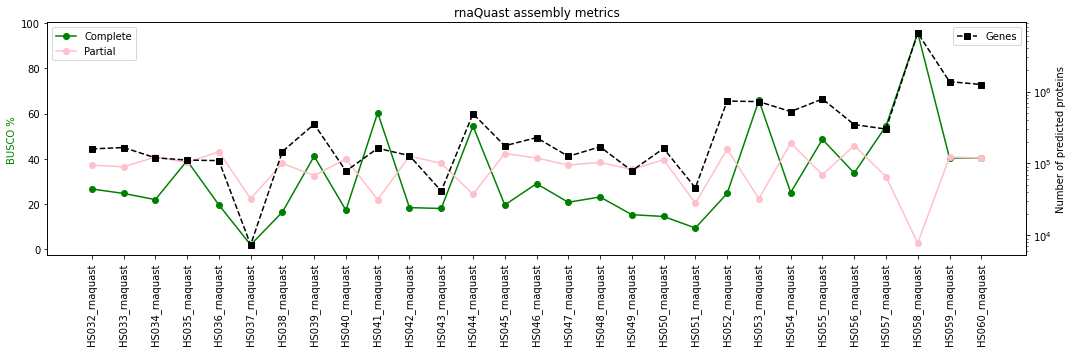

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(summary_df)
#df = df.drop('Total length') 

primary_metrics = ['Complete','Partial']
secondary_metrics = ['Genes']

primary_colors = ['green','pink']
secondary_colors = ['black']

# Plotting
fig, ax1 = plt.subplots(figsize=(15, 5))

# Plot primary metrics on ax1 (left y-axis)
for idx, sample in enumerate(df.index):
    if sample in primary_metrics:
        color = primary_colors[primary_metrics.index(sample)]
        ax1.plot(df.columns, df.loc[sample].astype(float), marker='o', label=sample, color=color)

# Set labels and title for primary y-axis
#ax1.set_xlabel('Samples')
ax1.set_ylabel('BUSCO %', color=primary_colors[0])
ax1.set_title('rnaQuast assembly metrics')
plt.xticks(rotation=90)
#ax1.set_yscale('log')

# Create ax2 (right y-axis) for secondary metrics
ax2 = ax1.twinx()

# Plot secondary metrics on ax2 (right y-axis)
for idx, sample in enumerate(df.index):
    if sample in secondary_metrics:
        color = secondary_colors[secondary_metrics.index(sample)]
        ax2.plot(df.columns, df.loc[sample].astype(float), marker='s', linestyle='--', label=sample, color=color)

# Set labels for secondary y-axis
ax2.set_ylabel('Number of predicted proteins', color=secondary_colors[0])

# Show legends for both plots
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax2.set_yscale('log')

# Adjust layout and show plot
plt.tight_layout()
plt.show()